# Data Science Challenge

**_Autor:_** Faramiñán Adán

PizzaBytes wants to add five new pizzas to their offering, however they are struggling with deciding their prices. What they do know is that they want their pricing to be aligned as much as possible with their current products. Could you assist them in this endeavor using your data science skills?
Below you have a dataset consisting of 15 pizzas, the ingredients used, and their prices. Can you estimate the prices for the five new pizzas?

## Data Load

Se cargan los datos del pdf. Los mismos fueron llevados a un spreadsheet y se generó un archivo.csv. Consideraciones
* Los ingredientes separados con un "+" se tomaron por separado. Ej: ``"chicken + spicy pork"`` : ``"chicken"`` , ``"spicypork"``

In [69]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
# Leemos el archivo como csv desde pd
data = pd.read_csv("datascience.csv", sep=' ;', header=0)
data.columns = data.columns.str.replace(" ","")
data["ingredients"]= (data["ingredients"].str.replace("+",",")).str.replace(", ",",").str.replace(" ,",",")

# Muestra las primeras 10 filas
data

,pizza_id,ingredients,price
0,pizza margherita,"mozzarella cheese,tomato sauce",16.99
1,farmhouse,"ham,mushrooms",18.99
2,hawaiian,"ham,pineapple",18.99
3,pepperoni,"double pepperoni,mozzarella",20.99
4,meat,"spicy pork,ham,pepperoni,seasoned minced beef",20.99
5,meaty one,"pepperoni,pork,beef,smoked bacon,chicken",20.99
6,bbq,"bbq sauce,bacon,chicken",20.99
7,chicken,"chicken,mushrooms,peppers,red onions",20.99
8,veggie,"mushrooms,peppers,red onions,tomato",18.99
9,meat combo,"pepperoni,pork,beef,smoked bacon,chicken,spicy...",54.99


In [70]:
df = pd.concat([data["price"], 
                pd.get_dummies(data['ingredients'].str.split(',', expand=True),  prefix='', prefix_sep='').sum(level=0, axis=1)], 
               axis=1)
for i in df.columns:
    print(i)

price
bbq
bbq sauce
beef
chicken
chillies
double pepperoni
green chillies
ham
mozzarella cheese
mushrooms
peperoni
pepperoni
peppers
red onions
spicy pork
bacon
jalapenos
mixed peppers
mozzarella
pineapple
pork
pork spicy
sliced black olives
sweetcorn
tomato sauce
mozarella
pork sausage
sliced
tomato
onions
seasoned beef
seasoned minced beef
smoked bacon


Se corrigió:
* Doble pepperoni = se agrego dos veces la palabra pepperoni
* Se unieron ingredientes que se consideran iguales
    * Mozzarela y Mozzarella cheese
    * bbq y bbq sauce
* y las palabras mal escritas
    * Peperoni
    * Mozarela

In [71]:
for m,i in enumerate(data["ingredients"]):
    ing = i.split(",")
    for n,j in enumerate(ing):
        if j == "peperoni":
            ing[n]= "pepperoni"      
        if j == "mozarella" or j == "mozzarella cheese":
            ing[n] = "mozzarella"
        if j == "bbq sauce":
            ing[n] = "bbq"
    data["ingredients"][m]= ','.join(ing)

In [84]:
df = pd.concat([data["price"], 
                pd.get_dummies(data['ingredients'].str.split(',', expand=True),  prefix='', prefix_sep='').sum(level=0, axis=1)], 
               axis=1).set_index(data["pizza_id"])
copy = df.copy()
copy

,price,bbq,bbq sauce,beef,chicken,chillies,double pepperoni,green chillies,ham,mozzarella,...,sliced black olives,sweetcorn,tomato sauce,pork sausage,sliced,tomato,onions,seasoned beef,seasoned minced beef,smoked bacon
pizza_id,,,,,,,,,,,,,,,,,,,,,
pizza margherita,16.99,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
farmhouse,18.99,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
hawaiian,18.99,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
pepperoni,20.99,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
meat,20.99,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
meaty one,20.99,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
bbq,20.99,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chicken,20.99,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
veggie,18.99,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


# Preprocesamiento

Contabilización de datos

In [91]:
df = df.dropna()

Creación de variables polinómicas:
Elevo al cuadrado las variables y agrego interacciones.
El objetivo

In [92]:
from sklearn.preprocessing import PolynomialFeatures
gp = 2 # Grado del polinomio
pf = PolynomialFeatures(degree=gp)

#Target
target = 'price'

# Transformación de las variables según grado de polinomio
feature_cols = [x for x in df.columns if x != target]
fit = pf.fit_transform(df[feature_cols]) 

# lista de las variables seleccionadas originalmente del df y las elevadas por gp
columns = pf.get_feature_names(input_features=feature_cols)

# Nuevo df a partir del fit, con el nombre de columns y el indice del df original
df=pd.DataFrame(fit, columns =columns, index = df.index)[columns[1:]] 

df['price'] =data['price'].dropna()


E:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Partición de datos

In [93]:
from sklearn.model_selection import train_test_split
        
train, test = train_test_split(df, test_size=0.30, random_state=1)    # Genera dos df: train y test. Test_size es el porcentaje de datos de testeo.      
    
# Create the data sets
X_train = train.copy()[feature_cols]
X_test = test.copy()[feature_cols]
y_train = train.copy()[target]
y_test = test.copy()[target]

Histograma de proporción de datos de entrenamiento y testeo de la variable dependiente

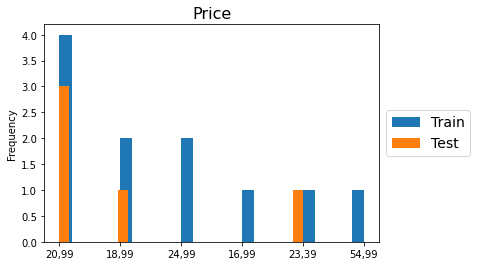

In [73]:
import matplotlib.pyplot as plt
plt.hist(y_train,  bins=25)
plt.hist(y_test,  bins=25)
plt.ylabel('Frequency')
plt.title('Price', fontsize = 16)
plt.legend(['Train', 'Test'],loc='center left', bbox_to_anchor=(1, 0.5),fontsize = 14)

Estandarizar las variables explicativas.

In [ ]:
scaled_x_train = scaler.fit_transform(X_train)
scaled_x_test = scaler.transform(X_test)

## Pruebas de algoritmos 

## *Random Forest*

En el siguiente código se desarrolla el algoritmo de regresión ***Random Forest***. Se busca los hiperparámetros óptimos para el mejor rendimiento.

In [113]:
#=========================================================================
#=============   Random Forest Regression (RF)    ========================
#=========================================================================

from sklearn.ensemble import RandomForestRegressor
import random
from sklearn.model_selection import GridSearchCV
    
def grid_RF(x_train, y_train):     

    random.seed(10)
    np.random.seed(10)


    # Number of trees in random forest
    n_estimators = [50, 100, 200]
    # Maximum number of levels in tree
    max_depth = [10, 30, 50]
    max_depth.append(None)
    # Minimum number of samples required to split a node
    min_samples_split = [2, 5]
    # Minimum number of samples required at each leaf node
    min_samples_leaf = [1, 2, 4]
    
    # Create the random grid
    param_grid = {'bootstrap': [True], # Method of selecting samples for training each tree
     'ccp_alpha': [0.0],
     'criterion': ['squared_error'],
     'max_depth': max_depth,
     'max_features': ['auto'], # Number of features to consider at every split
     'max_leaf_nodes': [None],
     'max_samples': [None],
     'min_impurity_decrease': [0.0],
     'min_samples_leaf': min_samples_leaf,
     'min_samples_split': min_samples_split,
     'min_weight_fraction_leaf': [0.0],
     'n_estimators': n_estimators,
     'n_jobs': [None],
     'oob_score': [False],
     'random_state': [None],
     'verbose': [0],
     'warm_start': [False]}

    RF = GridSearchCV(RandomForestRegressor(),param_grid,cv=5) # prueba con todas las combinaciones definidas en param_grid
                                                              # cv se refiere a cross validation
    RF.fit(x_train, y_train)
    RF = RF.best_estimator_ # elije el mejor estimador de acuerdo a las métricas
    return RF

Tiempo de procesamiento del algoritmo

In [95]:
import time
import numpy as np
start = time.time()
RF = grid_RF(df[feature_cols],df[target])
end = time.time()
time_RF = end -start
print(RF) # imprime los parámetros del mejo algorítmo
print(f'La rutina tardó en procesar {time_RF:0.3f} segundos')


RandomForestRegressor(max_depth=30, min_samples_split=5, n_estimators=50)
La rutina tardó en procesar 52.943 segundos


Cálculo de métricas de evaluación

In [98]:
# Cross validation sólo para el mejor modelo con sus hiperparámetros
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import statistics

cv = KFold(n_splits=5, random_state=1, shuffle=True) # shuffle = True agarra datos aleatoriamente y no por bloques
mae_RF = cross_val_score(RF, df[feature_cols], df[target], scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1) # MAE: error cuadrático absoluto
rmse_RF = cross_val_score(RF, df[feature_cols], df[target], scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1) # RMSE: raiz del error cuadrático medio
score_RF = cross_val_score(RF, df[feature_cols], df[target], scoring='r2', cv=cv, n_jobs=-1)

print(f'{70*"="}\n\tR2={np.mean(score_RF):0.3f} ,SD={statistics.stdev(score_RF):0.3f}\n\tRMSE={-np.mean(rmse_RF):0.3f} ,SD={statistics.stdev(rmse_RF):0.3f} \n{70*"="}')

	R2=-4.476 ,SD=9.485
	RMSE=6.880 ,SD=7.581 


## Importancia de las variables en RF o Boosting Machine (algorítmos de árboles de decisiones)

In [100]:
from sklearn.inspection import permutation_importance
#=========================

# get importance
importance1 = (RF.feature_importances_)

# plot feature importance

new  = pd.DataFrame([importance1,columns[1:],['RF' for x in range(len(columns[1:]))]]).T
new['imp'], new['variable'],new['Model'] = new[0],new[1],new[2]
new = new.drop(columns=[0,1,2])
new = new.sort_values(by='imp', ascending=False, ignore_index = True)


Gráfico de la importancia de las variables

Text(0.5, 1.0, 'Feature importance')

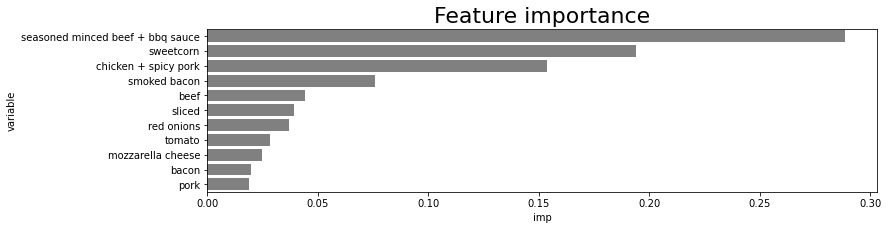

In [107]:
import seaborn as sns

fig, ax = plt.subplots( figsize=(12,3))
#ax.set_xlabel('Importance')
d = sns.barplot(x='imp', y='variable',data = new.loc[:10], color = 'gray')
d.set_title('Feature importance',size = 22)
#cd.set_xscale("log")
#fig.savefig('ET_XGBR_imp'+str(gp)+'_'+y2+'.png', dpi=300)

## *Support Vector Regressor*

En el siguiente código se desarrolla el algoritmo de regresión ***Support Vector Regressor***. Se busca los hiperparámetros óptimos para el mejor renimiento.

In [114]:
#=========================================================================
#=============  Support vector machine based regressor (SVR)     =========
#=========================================================================
    
def grid_SVR(x_train, y_train):
    import random
    random.seed(10)
    np.random.seed(10)

    from sklearn.svm import SVR
    param = {'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),
             'C' : [100,200,500],
             'degree' : [3,8],
             'coef0' : [0.01,0.1,0.5],
             'gamma' : ('auto','scale')},

    modelsvr = SVR(max_iter =2000)

    SVR = GridSearchCV(modelsvr,param,cv=5)

    SVR.fit(x_train, y_train)
    # evaluamos los modelos

    SVR = SVR.best_estimator_
    return SVR


In [115]:
from ssl import SSLCertVerificationError
start = time.time()
SVR = grid_SVR(df[feature_cols],df[target])
end = time.time()
time_SVR = end -start
print(SVR)
print(f'La rutina tardó en procesar {time_SVR:0.3f} segundos')    


SVR(C=100, coef0=0.01, max_iter=2000)
La rutina tardó en procesar 2.839 segundos


Obtener los hiperparámetros del algoritmo

In [ ]:
SVR.get_params()

{'C': 500,
 'cache_size': 200,
 'coef0': 0.01,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'auto',
 'kernel': 'linear',
 'max_iter': 2000,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

Cálculo de métricas de evaluación

In [116]:
# Cross validation sólo para el mejor modelo con sus hiperparámetros
cv = KFold(n_splits=5, random_state=1, shuffle=True)
mae_SVR = cross_val_score(SVR, df[feature_cols], df[target], scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
rmse_SVR = cross_val_score(SVR, df[feature_cols], df[target], scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
score_SVR = cross_val_score(SVR, df[feature_cols], df[target], scoring='r2', cv=cv, n_jobs=-1)
nse_SVR = 1 - (rmse_SVR / statistics.stdev(y_test))**2
print(f'{70*"="}\n\tR2={np.mean(score_SVR):0.3f} ,SD={statistics.stdev(score_SVR):0.3f}\n\tRMSE={-np.mean(rmse_SVR):0.3f} ,SD={statistics.stdev(rmse_SVR):0.3f} \n{70*"="}')

	R2=-2.657 ,SD=5.550
	RMSE=6.897 ,SD=7.306 


## Predict price

In [136]:
new_df = pd.concat([data["price"], data['ingredients'].str.get_dummies(sep=',')], axis=1)[data["price"].isna()]
new_df["price"] = RF.predict(new_df[feature_cols])

pd.DataFrame(list(new_df["price"]),columns = ["Price"],index=(data["pizza_id"][data["price"].isna()]))

,Price
pizza_id,
bbq feast,20.284381
supreme,22.926200
veggie,20.684048
mexico,23.761200
rustico,21.752200


In [137]:
data

,pizza_id,ingredients,price
0,pizza margherita,"mozzarella cheese,tomato sauce",16.99
1,farmhouse,"ham,mushrooms",18.99
2,hawaiian,"ham,pineapple",18.99
3,pepperoni,"double pepperoni,mozzarella",20.99
4,meat,"spicy pork,ham,pepperoni,seasoned minced beef",20.99
5,meaty one,"pepperoni,pork,beef,smoked bacon,chicken",20.99
6,bbq,"bbq sauce,bacon,chicken",20.99
7,chicken,"chicken,mushrooms,peppers,red onions",20.99
8,veggie,"mushrooms,peppers,red onions,tomato",18.99
9,meat combo,"pepperoni,pork,beef,smoked bacon,chicken + spi...",54.99
